<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/FIGURE3_Kahle_Stultz_(Kenji_Hosooka).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [33]:
fileDownloaded = drive.CreateFile({'id': '19_kL4uI2L_bJS8L8cimY5g1Znw2CjhEO'})
fileDownloaded.GetContentFile('Figure3.csv')

In [34]:
df = pd.read_csv('Figure3.csv',encoding = "cp932")
df.head()

,日経会社コード,企業名称,決算期,決算種別,連結基準,<貸借対照表（資産）>資産合計(百万円),<貸借対照表（資産）>固定資産／非流動資産(百万円),<貸借対照表（資産）>有形固定資産(百万円),<貸借対照表（資産）>償却対象有形固定資産(百万円),<貸借対照表（資産）>現金・預金／現金及び現金同等物(百万円),<貸借対照表（資産）>棚卸資産(百万円),<貸借対照表（資産）>その他棚卸資産(百万円)
0,1,極洋,1984/10,10,1,93094.0,24898.0,10828.0,9692.0,16300.0,19279.0,NaN
1,1,極洋,1985/10,10,1,82267.0,21558.0,7033.0,5986.0,14433.0,17570.0,NaN
2,1,極洋,1986/10,10,1,82394.0,20038.0,7418.0,6643.0,13787.0,17172.0,NaN
3,1,極洋,1987/10,10,1,85497.0,18317.0,6835.0,6144.0,13887.0,20627.0,NaN
4,1,極洋,1988/03,10,1,82382.0,17664.0,6541.0,5849.0,14008.0,17216.0,NaN


In [43]:
df = df.drop(columns={'<貸借対照表（資産）>その他棚卸資産(百万円)'})
df = df.drop(columns={'日経会社コード'})
df = df.drop(columns={'決算種別'})
df = df.drop(columns={'連結基準'})
df = df.drop(columns={'<貸借対照表（資産）>有形固定資産(百万円)'})
df = df.drop(columns={'<貸借対照表（資産）>償却対象有形固定資産(百万円)'})

In [44]:
df = df.rename(columns={'<貸借対照表（資産）>現金・預金／現金及び現金同等物(百万円)':'Cash'}) 
df = df.rename(columns={'<貸借対照表（資産）>棚卸資産(百万円)':'Inventory'})
df = df.rename(columns={'<貸借対照表（資産）>資産合計(百万円)':'Assets'})
df = df.rename(columns={'<貸借対照表（資産）>固定資産／非流動資産(百万円)':'Fixed Assets'})

In [45]:
df.head()

,企業名称,決算期,Assets,Fixed Assets,Cash,Inventory
0,極洋,1984/10,93094.0,24898.0,16300.0,19279.0
1,極洋,1985/10,82267.0,21558.0,14433.0,17570.0
2,極洋,1986/10,82394.0,20038.0,13787.0,17172.0
3,極洋,1987/10,85497.0,18317.0,13887.0,20627.0
4,極洋,1988/03,82382.0,17664.0,14008.0,17216.0


In [46]:
df['fyear'] = df['決算期'].str[:4]
df['fyear'] = df['fyear'].astype(int)
df = df.drop(columns={'決算期'})

In [47]:
df.head()

,企業名称,Assets,Fixed Assets,Cash,Inventory,fyear
0,極洋,93094.0,24898.0,16300.0,19279.0,1984
1,極洋,82267.0,21558.0,14433.0,17570.0,1985
2,極洋,82394.0,20038.0,13787.0,17172.0,1986
3,極洋,85497.0,18317.0,13887.0,20627.0,1987
4,極洋,82382.0,17664.0,14008.0,17216.0,1988


In [48]:
df['Cash/Assets'] = df['Cash']/df['Assets']
df['Fixed Assets/Assets'] = df['Fixed Assets']/df['Assets']
df['Inventory/Assets'] = df['Inventory']/df['Assets']

In [49]:
df.head()

,企業名称,Assets,Fixed Assets,Cash,Inventory,fyear,Cash/Assets,Fixed Assets/Assets,Inventory/Assets
0,極洋,93094.0,24898.0,16300.0,19279.0,1984,0.175092,0.267450,0.207092
1,極洋,82267.0,21558.0,14433.0,17570.0,1985,0.175441,0.262049,0.213573
2,極洋,82394.0,20038.0,13787.0,17172.0,1986,0.167330,0.243197,0.208413
3,極洋,85497.0,18317.0,13887.0,20627.0,1987,0.162427,0.214241,0.241260
4,極洋,82382.0,17664.0,14008.0,17216.0,1988,0.170037,0.214416,0.208978


In [50]:
df = df.drop(columns={'Assets'})
df = df.drop(columns={'Fixed Assets'})
df = df.drop(columns={'Cash'})
df = df.drop(columns={'Inventory'})

In [51]:
df.head()

,企業名称,fyear,Cash/Assets,Fixed Assets/Assets,Inventory/Assets
0,極洋,1984,0.175092,0.267450,0.207092
1,極洋,1985,0.175441,0.262049,0.213573
2,極洋,1986,0.167330,0.243197,0.208413
3,極洋,1987,0.162427,0.214241,0.241260
4,極洋,1988,0.170037,0.214416,0.208978


In [52]:
grouped = df.groupby(['fyear'])[['Cash/Assets','Fixed Assets/Assets','Inventory/Assets']].mean()
grouped

,Cash/Assets,Fixed Assets/Assets,Inventory/Assets
fyear,,,
1975,0.134206,0.343612,0.197359
1976,0.151518,0.332499,0.165061
1977,0.150210,0.326423,0.168338
1978,0.145214,0.338424,0.184460
1979,0.140609,0.334948,0.181562
1980,0.131268,0.322270,0.187308
1981,0.129422,0.328139,0.193287
1982,0.129208,0.335057,0.187268
1983,0.130316,0.342264,0.173961


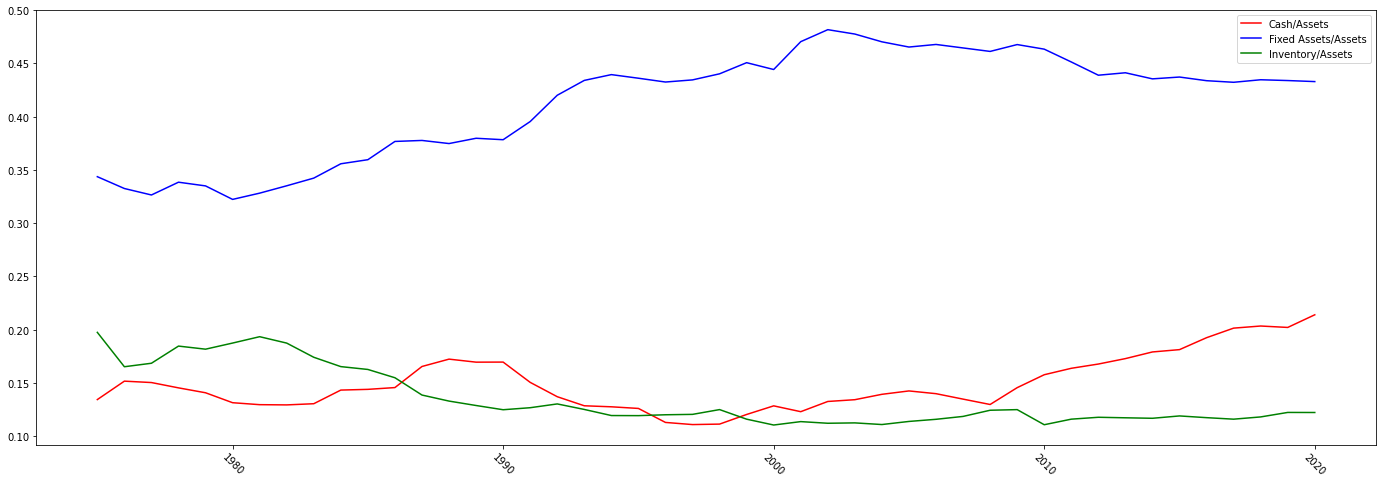

In [53]:
grouped[['Cash/Assets','Fixed Assets/Assets','Inventory/Assets']].plot.line(
     title='', 
     color = ("r","b","g"), xlabel = "", figsize=(24, 8), rot=-45)